10001


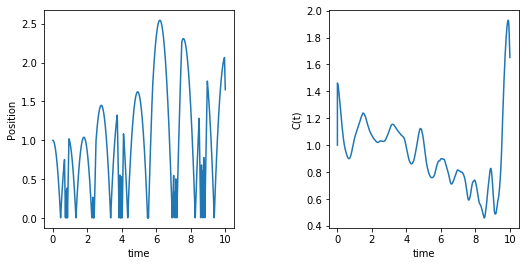

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x1=[]
x2=[]
v1=[]
v2=[]
t=[]
xc1=[]
xc2=[]
vc1=[]
vc2=[]
tc=[]
x1.append(float(1))
x2.append(float(3))
v1.append(float(0))
v2.append(float(0))
tt=float(10)
dt=float(.001)
t.append(0)
m1 = 1
m2 = 9*m1
g = 9.81
b=(m1-m2)/(m1+m2)
c=(2*m2)/(m1+m2)
d=(2*m1)/(m1+m2)
e=(m2-m1)/(m1+m2)

for i in range(int(tt/dt)):
    v1i=v1[i]-g*dt
    x1i=x1[i]+((v1i+v1[i])/2)*dt
    v2i=v2[i]-g*dt
    x2i=x2[i]+((v2i+v2[i])/2)*dt
    ti=t[i]+dt 
    if x1i<=0:
        x1i = -x1i
        v1i = -v1i
    if x1i>=x2i:
        vc1.append(v1i)
        vc2.append(v2i)
        v1i = b*v1[i]+c*v2[i]
        v2i = d*v1[i]+e*v2[i]
        x1temp=x1i
        x2temp=x2i
        x1i=x2temp
        x2i=x1temp
        xc1.append(x1i)
        xc2.append(x2i)
        tc.append(ti)
    x1.append(x1i)
    x2.append(x2i)
    v1.append(v1i)
    v2.append(v2i)
    t.append(ti)
    
df = pd.read_csv('nasdaq-historical-chart.csv')

#df.head()
df.columns = ['time', 'value']


N = len(x1)
print(N)

Ct = []
for lag in range(0,10001,1):
    total = 0
    n = 0
    for i in range(0,N-lag):
        tmp = x1[i]*x1[i+lag]
        total = total + tmp
        n = n+1
    
    avg = total/n
    Ct.append(avg)
    

M = len(Ct)
#normalize by the variance
for i in range(0,M):
    Ct[i] = Ct[i]/Ct[0]

x11 = np.linspace(0,N,N)
x22 = np.linspace(0,M,M)

plt.figure(1, figsize=(8.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(121)
ax.set_xlabel('time')
ax.set_ylabel('Position')
#ax.set_xlim(left=1)
plt.plot(t,x1)

ax2 = plt.subplot(122)
ax2.set_xlabel('time')
ax2.set_ylabel('C(t)')
#ax2.set_xlim(left=1)
plt.plot(t,Ct)

plt.show()